## 이상치 탐지

In [1]:
from scipy.io import loadmat

In [17]:
!pip install pyod

     |████████████████████████████████| 111 kB 7.2 MB/s eta 0:00:01
  Using cached numba-0.53.1-cp36-cp36m-manylinux2014_x86_64.whl (3.4 MB)
  Using cached statsmodels-0.12.2-cp36-cp36m-manylinux1_x86_64.whl (9.5 MB)
  Using cached llvmlite-0.36.0-cp36-cp36m-manylinux2010_x86_64.whl (25.3 MB)
     |████████████████████████████████| 233 kB 13.5 MB/s eta 0:00:01
  Created wheel for pyod: filename=pyod-0.9.4-py3-none-any.whl size=130722 sha256=b1b5e47a5234c21aa066e4a15a15cf9a3fbc99b0989af3a0c2330cb83c7a11ce
  Stored in directory: /root/.cache/pip/wheels/7e/1a/ca/4bbe5f2a33a738c6d16d8308fcecf4b46649e46796d39883dd
Successfully built pyod
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


In [47]:
from pyod.utils.data import generate_data
from pyod.utils.example import visualize
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

/usr/local/lib/python3.6/dist-packages/pyod/utils/data.py:190: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.9.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


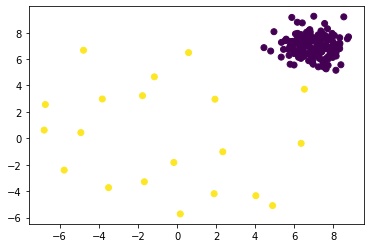

In [49]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

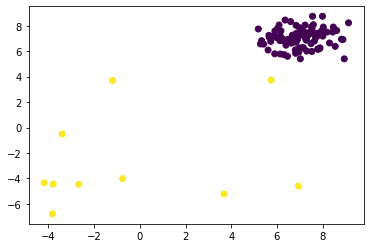

In [50]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

In [51]:
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from pyod.models.lof import LOF


In [64]:
clf = KNN()
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [65]:
y_pred=clf.predict(X_test)

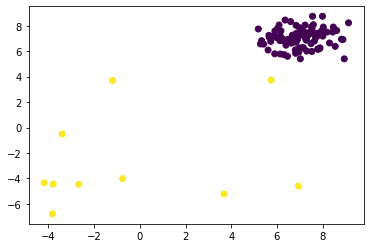

In [66]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

## 이상치 평가

In [74]:
from sklearn.metrics import roc_auc_score

score=clf.predict_proba(X_test)[:,1] ## 이상치일 확률
roc_auc_score(y_test,score) ## 확률값에 따른 ROC_AUC 계산

1.0

## 이상치 평가

In [87]:
from pyod.utils import evaluate_print
evaluate_print(clf,y_test,y_pred)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0) ROC:1.0, precision @ rank n:1.0


## 우주선 테스트 데이터셋

In [88]:
data=loadmat('shuttle.mat')
X=data['X']

In [89]:
y=data['y']

In [90]:
X=(X-X.mean())/X.std()

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,shuffle=True)

In [92]:
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from pyod.models.lof import LOF



In [93]:
clf = IForest()
clf.fit(X_train)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [94]:
score=clf.decision_function(X_test)

In [95]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,score)

0.997816452969696

In [96]:
from pyod.utils import evaluate_print
evaluate_print(clf,y_test,score)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0) ROC:0.9978, precision @ rank n:0.9464


In [98]:
algos={'iforest':IForest(),'knn':KNN(),'pca':PCA(),'lof':LOF()}
for i in algos:
    algos[i].fit(X_train)
    score=algos[i].decision_function(X_test)
    evaluate_print(i,y_test,score )

iforest ROC:0.9978, precision @ rank n:0.9636
knn ROC:0.7378, precision @ rank n:0.2407
pca ROC:0.9927, precision @ rank n:0.9579
lof ROC:0.5585, precision @ rank n:0.1257
